In [1]:
##################################################################################################
##   Notebook used for extracting text from html files. Some basic preprocessing tasks 
##   v2.0 Preprocessing Text   
##       - Stopword removal
##       - Stemming/ Lemmatization
##
##   Required packages: os, BeautifulSoup, nltk, ,wordcloud 
##   The following is used from the nltk packages: corpoira/stopwords, SnowballStemmer, WordNetLemmatizer
##
##################################################################################################

In [2]:
import os 
from bs4 import BeautifulSoup as bs

In [4]:
# Function created for removing HTML tags from a document 
def clean_html(htmlDoc):
    soup = bs(htmlDoc, 'html.parser') # Parses text so that html tags can be extracted
    for script in soup(["script", "style","title",'[document]', 'head', 'title']):
        script.extract() 
    cleaned=str(soup.get_text(separator=' ').encode('ascii','ignore'))
    return cleaned.strip()

In [5]:
## Read all the html files and open the first speech
rootDir = 'E:\\NLP Session\\RBIGovernorSpeeches\\'
htmlFiles = [f for f in os.listdir(rootDir) if f.endswith('.html')]

fileName = rootDir + htmlFiles[0] 
cleanedtext = clean_html(open(fileName))

In [6]:
###########################################################################################################################
##  Second paragraph from the speech
###########################################################################################################################
text1 = 'Over the last few weeks, I have outlined the RBI’s approach to inflation, distressed debt, financial inclusion, banking sector reform, and market reform. Today, I’d like to first discuss why central banking is not as easy as it appears (just raise or cut interest rates!) and why it needs decisions, sometimes unpopular or hard-to-explain ones, to be made under conditions of extreme uncertainty. This will then lead in to my arguments about why we need an independent central bank.'
print text1

Over the last few weeks, I have outlined the RBI’s approach to inflation, distressed debt, financial inclusion, banking sector reform, and market reform. Today, I’d like to first discuss why central banking is not as easy as it appears (just raise or cut interest rates!) and why it needs decisions, sometimes unpopular or hard-to-explain ones, to be made under conditions of extreme uncertainty. This will then lead in to my arguments about why we need an independent central bank.


In [7]:
#from nltk.corpus import stopwords
#stopWords = set(stopwords.words('mystopwords'))

stopWords = [line.replace('\n', '') for line in open('stopwords') ]
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [8]:
## Use a lambda function to lower the text, tokenize it and remove it from the corpus if it belongs to the stopwords set 
##
filter(lambda w: not w in stopWords,text1.lower().split())

['last',
 'weeks,',
 'outlined',
 'rbi\xe2\x80\x99s',
 'approach',
 'inflation,',
 'distressed',
 'debt,',
 'financial',
 'inclusion,',
 'banking',
 'sector',
 'reform,',
 'market',
 'reform.',
 'today,',
 'i\xe2\x80\x99d',
 'like',
 'first',
 'discuss',
 'central',
 'banking',
 'easy',
 'appears',
 '(just',
 'raise',
 'cut',
 'interest',
 'rates!)',
 'needs',
 'decisions,',
 'sometimes',
 'unpopular',
 'hard-to-explain',
 'ones,',
 'made',
 'conditions',
 'extreme',
 'uncertainty.',
 'lead',
 'arguments',
 'need',
 'independent',
 'central',
 'bank.']

In [9]:
## There are some non- alphanumeric tokens in the text, removing them from the corpus
##
text2 = ''.join(w for w in text1 if (w.isalnum() or w ==' '))
text2

'Over the last few weeks I have outlined the RBIs approach to inflation distressed debt financial inclusion banking sector reform and market reform Today Id like to first discuss why central banking is not as easy as it appears just raise or cut interest rates and why it needs decisions sometimes unpopular or hardtoexplain ones to be made under conditions of extreme uncertainty This will then lead in to my arguments about why we need an independent central bank'

In [10]:
## Removing stopwords from the text corpus
##
filter(lambda w: not w in stopWords,text2.lower().split())

['last',
 'weeks',
 'outlined',
 'rbis',
 'approach',
 'inflation',
 'distressed',
 'debt',
 'financial',
 'inclusion',
 'banking',
 'sector',
 'reform',
 'market',
 'reform',
 'today',
 'id',
 'like',
 'first',
 'discuss',
 'central',
 'banking',
 'easy',
 'appears',
 'raise',
 'cut',
 'interest',
 'rates',
 'needs',
 'decisions',
 'sometimes',
 'unpopular',
 'hardtoexplain',
 'ones',
 'made',
 'conditions',
 'extreme',
 'uncertainty',
 'lead',
 'arguments',
 'need',
 'independent',
 'central',
 'bank']

In [11]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

clean_text = filter(lambda w: not w in stopWords,text2.lower().split()) ### << Stop word removal

stemmed_words = [stemmer.stem(word) for word in clean_text] 
stemmed_words

[u'last',
 u'week',
 u'outlin',
 u'rbis',
 u'approach',
 u'inflat',
 u'distress',
 u'debt',
 u'financi',
 u'inclus',
 u'bank',
 u'sector',
 u'reform',
 u'market',
 u'reform',
 u'today',
 'id',
 u'like',
 u'first',
 u'discuss',
 u'central',
 u'bank',
 u'easi',
 u'appear',
 u'rais',
 u'cut',
 u'interest',
 u'rate',
 u'need',
 u'decis',
 u'sometim',
 u'unpopular',
 u'hardtoexplain',
 u'one',
 u'made',
 u'condit',
 u'extrem',
 u'uncertainti',
 u'lead',
 u'argument',
 u'need',
 u'independ',
 u'central',
 u'bank']

In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

clean_text = filter(lambda w: not w in stopWords,text2.lower().split())

lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in clean_text] 
lemmatized_words

['last',
 u'week',
 'outlined',
 u'rbi',
 'approach',
 'inflation',
 'distressed',
 'debt',
 'financial',
 'inclusion',
 'banking',
 'sector',
 'reform',
 'market',
 'reform',
 'today',
 'id',
 'like',
 'first',
 u'discus',
 'central',
 'banking',
 'easy',
 'appears',
 'raise',
 'cut',
 'interest',
 u'rate',
 u'need',
 u'decision',
 'sometimes',
 'unpopular',
 'hardtoexplain',
 u'one',
 'made',
 u'condition',
 'extreme',
 'uncertainty',
 'lead',
 u'argument',
 'need',
 'independent',
 'central',
 'bank']

In [13]:
##################################################################################################
## Drawing a wordcloud using the wordcloud package
##
##################################################################################################

from os import path
from wordcloud import WordCloud
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

def drawWordcloud(text):
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    #wc_array = WordCloud.to_array(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return wordcloud

In [14]:
fileName = rootDir + htmlFiles[0] 
fileName

'E:\\NLP Session\\RBIGovernorSpeeches\\Reserve Bank of India - Speeches_1.html'

In [16]:
fileName = rootDir + htmlFiles[0] 
text = clean_html(open(fileName))
clean_text = filter(lambda w: not w in stopWords,text.lower().split())
clean_text = ' '.join(clean_text)
clean_text

"skip main content language search website search home us notifications press releases speeches publications annual half-yearly quarterly bi-monthly monthly weekly occasional reports lectures statistics data releases database indian economy home speeches speeches (89 kb) date : sep 03, 2016 independence central bank (dr. raghuram g. rajan, governor - september 3, 2016 - st. stephen's college, new delhi) good afternoon. great invited speak st. stephen's college. 1980, toyed idea joining best friends applying admission ba economics here. worked hard iit exam, however, succumbed sunk cost fallacy studied electrical engineering. dont regret moment misspent youth hope grant temporary membership club today! last weeks, outlined rbis approach inflation, distressed debt, financial inclusion, banking sector reform, market reform. today, id like first discuss central banking easy appears (just raise cut interest rates!) needs decisions, sometimes unpopular hard-to-explain ones, made conditions e

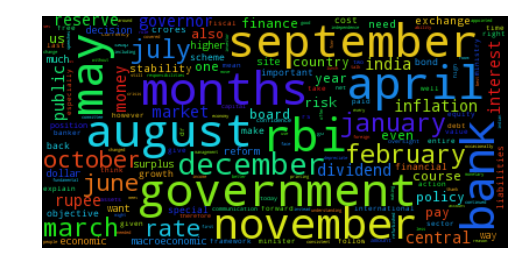

In [17]:
drawWordcloud(clean_text)

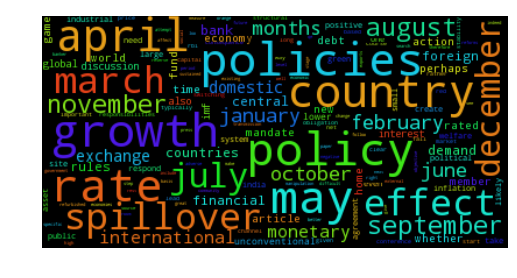

In [27]:
## Running the same code for a different speech
##
fileName = rootDir + htmlFiles[4] 
text = clean_html(open(fileName))
clean_text = filter(lambda w: not w in stopWords,text.lower().split())
clean_text = ' '.join(clean_text)
drawWordcloud(clean_text)